<a href="https://colab.research.google.com/github/mDianga/Autolib_Data_analysis_week4/blob/master/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
%matplotlib inline

In [3]:
# We loading our dataset_Autolib
url = "/content/Autolib_dataset .csv"
df = pd.read_csv(url)
df.head(5)


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


**Data cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [5]:
df.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [6]:
df.shape

(5000, 25)

In [7]:
# drop cells that are not necessary
df.drop(["Scheduled at","Displayed comment","Subscription status"], axis=1, inplace = True)
 

In [8]:
df.shape

(5000, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Address             5000 non-null   object
 1   Cars                5000 non-null   int64 
 2   Bluecar counter     5000 non-null   int64 
 3   Utilib counter      5000 non-null   int64 
 4   Utilib 1.4 counter  5000 non-null   int64 
 5   Charge Slots        5000 non-null   int64 
 6   Charging Status     5000 non-null   object
 7   City                5000 non-null   object
 8   ID                  5000 non-null   object
 9   Kind                5000 non-null   object
 10  Geo point           5000 non-null   object
 11  Postal code         5000 non-null   int64 
 12  Public name         5000 non-null   object
 13  Rental status       5000 non-null   object
 14  Slots               5000 non-null   int64 
 15  Station type        5000 non-null   object
 16  Status              5000

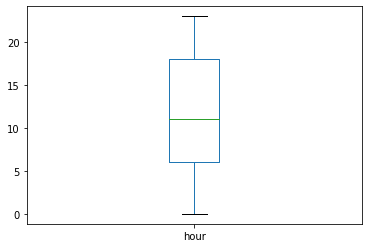

In [10]:
# detecting any outliers
df.boxplot(column =['hour'], grid = False) 

In [11]:
# check for any duplicates on your data
df.isnull().sum().sort_values(ascending=False)

minute                0
hour                  0
Cars                  0
Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
Charge Slots          0
Charging Status       0
City                  0
ID                    0
Kind                  0
Geo point             0
Postal code           0
Public name           0
Rental status         0
Slots                 0
Station type          0
Status                0
year                  0
month                 0
day                   0
Address               0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    5000
dtype: int64

In [13]:
# Identifying the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.?
df['City'].value_counts()

Paris                    2816
Nanterre                  127
Issy-les-Moulineaux       101
CrÃ©teil                   88
Rueil-Malmaison            88
                         ... 
Saclay                      4
Le PrÃ©-Saint-Gervais       4
Clichy la garenne           3
Saint-Maur                  2
Epinay-sur-Seine            1
Name: City, Length: 88, dtype: int64

In [14]:
# What is the most popular hour for returning cars?
df['hour'].value_counts()

21    237
9     221
16    220
7     219
6     219
3     218
2     218
13    213
8     211
5     211
11    210
18    210
19    208
14    207
20    202
23    201
12    200
15    200
4     199
17    198
22    196
1     194
10    194
0     194
Name: hour, dtype: int64

In [21]:
# What station is the most popular?
# Overal?
df['Station type'].value_counts()

station         4615
full_station     382
subs_center        3
Name: Station type, dtype: int64

In [22]:
df.groupby(["Station type"]) .size() #Most used station type 

Station type
full_station     382
station         4615
subs_center        3
dtype: int64

In [24]:
# What station is the most popular?
# At the most popular picking hour?
df['Station type'].max() 

'subs_center'

In [27]:
df.groupby(['Station type', 'hour']) 
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,2018,4,4,17,27


In [33]:
# What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
# Overall?
df['Postal code'].value_counts()


75015    274
75016    236
75017    221
75011    180
75020    169
        ... 
93300      5
92110      4
91400      4
93310      4
94100      2
Name: Postal code, Length: 107, dtype: int64

In [34]:
df['Postal code'].max() 

95880